# Paquetes

In [30]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler

import tensorflow as tf

# Visualizacion previa de datos

In [2]:
path = os.getcwd()

In [3]:
c_df = pd.read_csv(os.path.join(path, 'Datos', 'Data_Coyhaique.csv'), index_col = [0])
c_df = c_df.set_index(pd.to_datetime(c_df.index))

In [4]:
c_df.isna().sum()/len(c_df)*100

Presion        0.264085
Temperatura    0.310544
HR             0.308099
RapViento      0.408353
O3             8.514280
CO             8.560739
PM25           1.978189
PM10           1.672535
SO2            2.616393
DoY            0.000000
DoW            0.000000
dtype: float64

In [5]:
c_df = c_df.fillna(value = c_df.mean())

In [6]:
c_df_mean = c_df.resample('D',kind = 'timestamp').mean()

In [7]:
c_df_mean

,Presion,Temperatura,HR,RapViento,O3,CO,PM25,PM10,SO2,DoY,DoW
2018-01-01,969.583333,9.612501,67.875000,4.754167,11.375849,0.796953,11.583333,16.000000,2.342500,1.0,1.0
2018-01-02,964.333333,12.633333,67.291667,4.462500,11.375849,0.796953,8.875000,12.666667,2.283333,2.0,2.0
2018-01-03,956.333333,11.683333,64.875000,4.008333,11.375849,0.796953,11.750000,17.041667,2.405000,3.0,3.0
2018-01-04,956.958333,8.708333,69.166667,3.712500,11.375849,0.796953,15.449413,20.952188,2.277917,4.0,4.0
2018-01-05,970.916667,10.137500,60.666667,5.525000,11.375849,0.796953,9.833333,17.125000,1.572500,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-27,981.298417,3.674328,58.290054,4.231699,12.083333,0.773333,37.083333,38.250000,1.594583,239.0,6.0
2022-08-28,983.387333,4.749944,61.044546,1.321621,10.208333,1.049583,59.291667,60.541667,1.615417,240.0,7.0
2022-08-29,973.471458,4.198099,59.810979,0.878979,5.083333,1.662083,100.125000,104.375000,2.050417,241.0,1.0
2022-08-30,972.757625,7.101256,68.694246,1.392455,8.250000,0.639167,27.416667,29.791667,1.762917,242.0,2.0


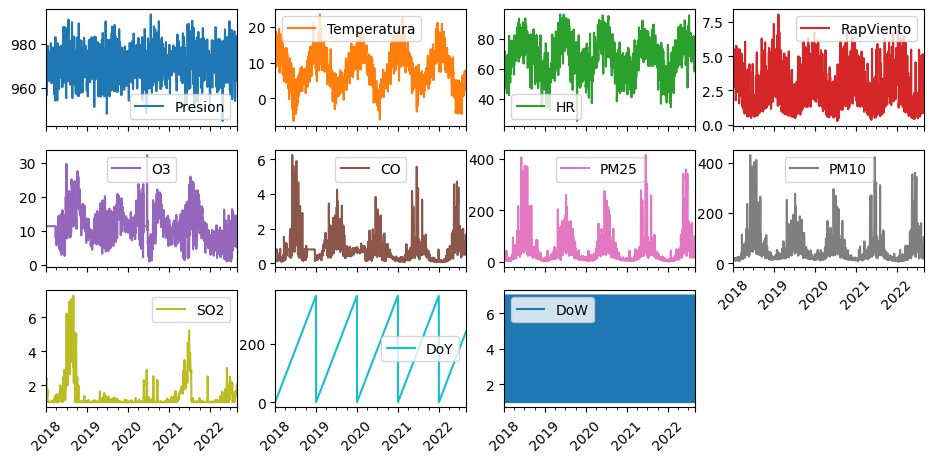

In [8]:
c_df_mean.plot(subplots = True, layout = (4,4), figsize = (7*(1+np.sqrt(5))/2,7), rot=45);

# Separación de datos

In [9]:
df_predictores = c_df_mean
df_predictores

,Presion,Temperatura,HR,RapViento,O3,CO,PM25,PM10,SO2,DoY,DoW
2018-01-01,969.583333,9.612501,67.875000,4.754167,11.375849,0.796953,11.583333,16.000000,2.342500,1.0,1.0
2018-01-02,964.333333,12.633333,67.291667,4.462500,11.375849,0.796953,8.875000,12.666667,2.283333,2.0,2.0
2018-01-03,956.333333,11.683333,64.875000,4.008333,11.375849,0.796953,11.750000,17.041667,2.405000,3.0,3.0
2018-01-04,956.958333,8.708333,69.166667,3.712500,11.375849,0.796953,15.449413,20.952188,2.277917,4.0,4.0
2018-01-05,970.916667,10.137500,60.666667,5.525000,11.375849,0.796953,9.833333,17.125000,1.572500,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-27,981.298417,3.674328,58.290054,4.231699,12.083333,0.773333,37.083333,38.250000,1.594583,239.0,6.0
2022-08-28,983.387333,4.749944,61.044546,1.321621,10.208333,1.049583,59.291667,60.541667,1.615417,240.0,7.0
2022-08-29,973.471458,4.198099,59.810979,0.878979,5.083333,1.662083,100.125000,104.375000,2.050417,241.0,1.0
2022-08-30,972.757625,7.101256,68.694246,1.392455,8.250000,0.639167,27.416667,29.791667,1.762917,242.0,2.0


In [10]:
df_target = c_df_mean['PM25']
df_target = df_target.shift(-1)

In [11]:
df_target.drop(df_target.index[-1], inplace = True)
df_predictores.drop(c_df_mean.index[-1], inplace = True)

In [12]:
df_target

2018-01-01      8.875000
2018-01-02     11.750000
2018-01-03     15.449413
2018-01-04      9.833333
2018-01-05      9.916667
                 ...    
2022-08-26     37.083333
2022-08-27     59.291667
2022-08-28    100.125000
2022-08-29     27.416667
2022-08-30     29.958333
Freq: D, Name: PM25, Length: 1703, dtype: float64

In [13]:
df_ml_predictores = df_predictores.loc['2018':'2021']
df_ml_target = df_target.loc['2018':'2021']

In [14]:
df_2022_predictores = df_predictores.loc['2022-01-01':'2022-08-30']
df_2022_target = df_target.loc['2022-01-01':'2022-08-30']

## Entrenamiento y Validación

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_ml_predictores, df_ml_target, test_size = 0.30, random_state = 42)

# Feed Forward Neural Network

## 1.- Arquitectura

In [54]:
model_ffnn = tf.keras.models.Sequential()


model_ffnn.add(tf.keras.layers.Dense(50, activation = tf.keras.activations.relu))
model_ffnn.add(tf.keras.layers.Dense(120, activation = tf.keras.activations.relu))
model_ffnn.add(tf.keras.layers.Dense(50, activation = tf.keras.activations.relu))

model_ffnn.add(tf.keras.layers.Dense(1, activation = tf.keras.activations.linear))

model_ffnn.compile(optimizer = 'adam',
                   loss = 'mean_squared_error',
                   metrics = ['mean_absolute_error','mean_squared_error'])

input_shape = X_train.shape
model_ffnn.build(input_shape)

model_ffnn.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (1022, 50)                600       
                                                                 
 dense_41 (Dense)            (1022, 120)               6120      
                                                                 
 dense_42 (Dense)            (1022, 50)                6050      
                                                                 
 dense_43 (Dense)            (1022, 1)                 51        
                                                                 
Total params: 12,821
Trainable params: 12,821
Non-trainable params: 0
_________________________________________________________________


## 2.- Entrenamiento

In [55]:
model_ffnn.fit(X_train, y_train, epochs = 5, batch_size = 100)

Epoch 1/5
11/11 [==============================] - 0s 2ms/step - loss: 2599.7561 - mean_absolute_error: 32.8978 - mean_squared_error: 2599.7561
Epoch 2/5
11/11 [==============================] - 0s 2ms/step - loss: 1669.9312 - mean_absolute_error: 26.5127 - mean_squared_error: 1669.9312
Epoch 3/5
11/11 [==============================] - 0s 2ms/step - loss: 1215.5789 - mean_absolute_error: 21.5969 - mean_squared_error: 1215.5789
Epoch 4/5
11/11 [==============================] - 0s 2ms/step - loss: 1130.8816 - mean_absolute_error: 18.9470 - mean_squared_error: 1130.8816
Epoch 5/5
11/11 [==============================] - 0s 2ms/step - loss: 1137.7223 - mean_absolute_error: 19.5150 - mean_squared_error: 1137.7223


In [72]:
model_ffnn.fit(X_train, y_train, epochs = 50, batch_size = 100)

Epoch 1/50
11/11 [==============================] - 0s 2ms/step - loss: 1061.4028 - mean_absolute_error: 17.7716 - mean_squared_error: 1061.4028
Epoch 2/50
11/11 [==============================] - 0s 2ms/step - loss: 1052.3542 - mean_absolute_error: 17.6573 - mean_squared_error: 1052.3542
Epoch 3/50
11/11 [==============================] - 0s 2ms/step - loss: 1060.0438 - mean_absolute_error: 17.9511 - mean_squared_error: 1060.0438
Epoch 4/50
11/11 [==============================] - 0s 2ms/step - loss: 1094.9230 - mean_absolute_error: 19.2212 - mean_squared_error: 1094.9230
Epoch 5/50
11/11 [==============================] - 0s 2ms/step - loss: 1083.2798 - mean_absolute_error: 18.7121 - mean_squared_error: 1083.2798
Epoch 6/50
11/11 [==============================] - 0s 2ms/step - loss: 1122.0845 - mean_absolute_error: 19.0030 - mean_squared_error: 1122.0845
Epoch 7/50
11/11 [==============================] - 0s 2ms/step - loss: 1076.1130 - mean_absolute_error: 18.4541 - mean_squared_er

## 3.- Evaluación

In [73]:
loss, mae, mse = model_ffnn.evaluate(X_test,y_test)

14/14 [==============================] - 0s 1ms/step - loss: 940.6173 - mean_absolute_error: 17.0218 - mean_squared_error: 940.6173


## 4.- Predicción

In [74]:
pred_2022_FFNN = model_ffnn.predict(df_2022_predictores)

8/8 [==============================] - 0s 997us/step


# Long-Short Term Memory

## 0.- Preprocesamiento LSTM

In [21]:
def rshp_features_lstm(features, n_steps):
  ini_batch = features.shape[0]
  n_features = features.shape[1]
  array_lstm = np.zeros((ini_batch, n_steps, n_features)) 
  for i in range(n_features):
    for j in range(n_steps):
      array_lstm[:,j,i] = np.roll(features.iloc[:,i],-j)

  array_lstm = np.delete(array_lstm, range(n_steps -1 ), axis = 0)
  return array_lstm

In [22]:
#ini_batch = df_ml_predictores.shape[0]
#n_features = df_ml_predictores.shape[1]
n_steps = 5

new_features_n = rshp_features_lstm(df_ml_predictores,n_steps)

new_target_n = df_ml_target.drop(df_ml_target.index[0:n_steps-1])

X_lstm_2022 = rshp_features_lstm(df_2022_predictores, n_steps)

In [23]:
X_train_lstm, X_test_lstm, Y_train_lstm, Y_test_lstm = train_test_split(new_features_n, new_target_n.values, test_size = 0.30, random_state = 42)

## 1.- Arquitectura

In [24]:
model_LSTM1 = tf.keras.models.Sequential()

model_LSTM1.add(tf.keras.layers.LSTM(50,input_shape=(X_train_lstm.shape[1],X_train_lstm.shape[2]), activation = tf.keras.activations.relu))


model_LSTM1.add(tf.keras.layers.Dense(1, activation = tf.keras.activations.linear))

model_LSTM1.compile(optimizer = 'adam',
                   loss = 'mean_squared_error',
                   metrics = ['mean_absolute_error','mean_squared_error'])

#input_shape = X_train_lstm.shape[1],X_train_lstm.shape[2])
#model_LSTM1.build((2, 9))

model_LSTM1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                12400     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 12,451
Trainable params: 12,451
Non-trainable params: 0
_________________________________________________________________


## 2.- Entrenamiento

In [66]:
model_LSTM1.fit(X_train_lstm, Y_train_lstm, epochs = 5, batch_size = 100)

Epoch 1/5
11/11 [==============================] - 0s 4ms/step - loss: 190.5800 - mean_absolute_error: 8.6035 - mean_squared_error: 190.5800
Epoch 2/5
11/11 [==============================] - 0s 4ms/step - loss: 193.0151 - mean_absolute_error: 8.7561 - mean_squared_error: 193.0151
Epoch 3/5
11/11 [==============================] - 0s 4ms/step - loss: 186.9846 - mean_absolute_error: 8.5543 - mean_squared_error: 186.9846
Epoch 4/5
11/11 [==============================] - 0s 4ms/step - loss: 168.4463 - mean_absolute_error: 8.1607 - mean_squared_error: 168.4463
Epoch 5/5
11/11 [==============================] - 0s 4ms/step - loss: 159.7758 - mean_absolute_error: 7.9588 - mean_squared_error: 159.7758


In [71]:
model_LSTM1.fit(X_train_lstm, Y_train_lstm, epochs = 50, batch_size = 100)

Epoch 1/50
11/11 [==============================] - 0s 4ms/step - loss: 137.9559 - mean_absolute_error: 7.3157 - mean_squared_error: 137.9559
Epoch 2/50
11/11 [==============================] - 0s 4ms/step - loss: 123.1314 - mean_absolute_error: 7.2987 - mean_squared_error: 123.1314
Epoch 3/50
11/11 [==============================] - 0s 4ms/step - loss: 119.5772 - mean_absolute_error: 7.0903 - mean_squared_error: 119.5772
Epoch 4/50
11/11 [==============================] - 0s 4ms/step - loss: 120.2270 - mean_absolute_error: 7.1066 - mean_squared_error: 120.2270
Epoch 5/50
11/11 [==============================] - 0s 4ms/step - loss: 120.6669 - mean_absolute_error: 7.1309 - mean_squared_error: 120.6669
Epoch 6/50
11/11 [==============================] - 0s 4ms/step - loss: 200.7572 - mean_absolute_error: 8.4471 - mean_squared_error: 200.7572
Epoch 7/50
11/11 [==============================] - 0s 4ms/step - loss: 198.6355 - mean_absolute_error: 8.2387 - mean_squared_error: 198.6355
Epoch 

## 3.- Evaluación

In [75]:
loss, mae, mse = model_LSTM1.evaluate(X_test_lstm,Y_test_lstm)

14/14 [==============================] - 0s 2ms/step - loss: 95.2356 - mean_absolute_error: 6.4214 - mean_squared_error: 95.2356


## 4.- Predicción

In [76]:
pred_2022_LSTM = model_LSTM1.predict(X_lstm_2022)

8/8 [==============================] - 0s 2ms/step


# Comparación de modelos

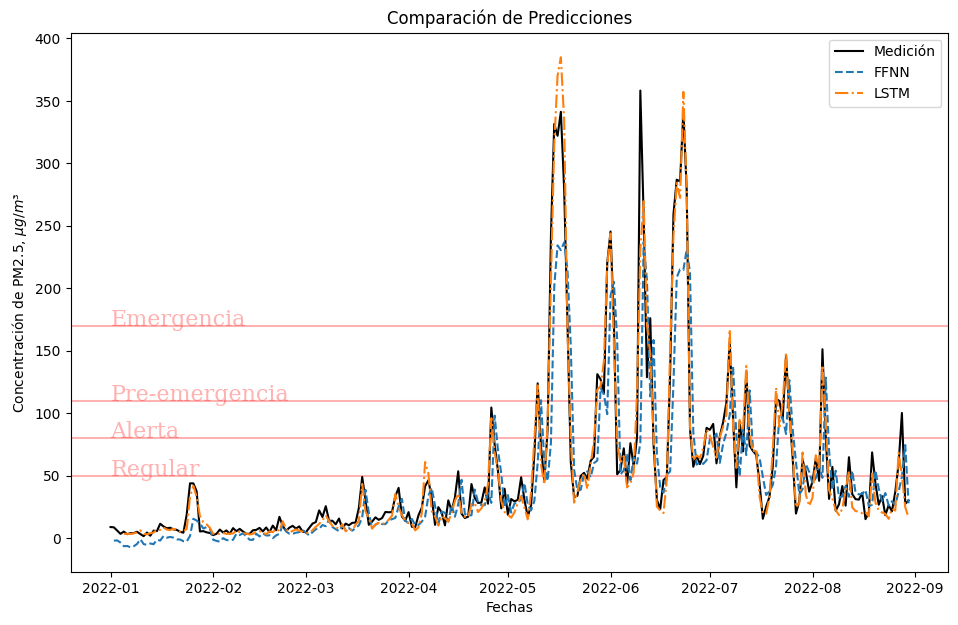

In [197]:
# df_2022_target, pred_2022_FFNN, pred_2022_LSTM
font = {'family': 'serif',
        'color':  'red',
        'weight': 'normal',
        'size': 16,
        'alpha': 0.3
        }

plt.figure(figsize = (7*(1+np.sqrt(5))/2,7))

plt.axhline(y = 50, color = 'r', linestyle = '-', alpha = 0.3)
plt.axhline(y = 80, color = 'r', linestyle = '-', alpha = 0.3)
plt.axhline(y = 110, color = 'r', linestyle = '-', alpha = 0.3)
plt.axhline(y = 170, color = 'r', linestyle = '-', alpha = 0.3)


plt.plot(df_2022_target, '-k', label = r'Medición')
plt.plot(df_2022_target.index[1::],pred_2022_FFNN[1::], '--', label = r'FFNN')
plt.plot(df_2022_target.index[4::],pred_2022_LSTM, '-.', label = r'LSTM')

plt.legend()

plt.text(df_2022_target.index[0], 50, r'Regular', font)
plt.text(df_2022_target.index[0], 80, r'Alerta', font)
plt.text(df_2022_target.index[0], 110, r'Pre-emergencia', font)
plt.text(df_2022_target.index[0], 170, r'Emergencia', font)

#plt.xticks(range(len(df_2022_target.index)),df_2022_target.index)
plt.title(r'Comparación de Predicciones')
plt.xlabel(r'Fechas')
plt.ylabel(r'Concentración de PM2.5, $\mu g/m³$')

plt.show()